# A Bayesian Framework for Persistent Homology
#### Authors: Christopher Oballe, Vasileios Maroulas

Herein, we provide a tutorial for a Python module that implements the model for Bayesian inference with persistence diagrams introduced in https://epubs.siam.org/doi/pdf/10.1137/19M1268719.

The module is hosted on github at https://github.com/maroulaslab/bayes_tda_python. It can also be installed from PyPI with the command:
```shell
pip install bayes_tda
```

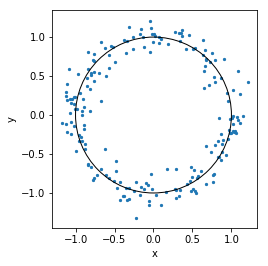

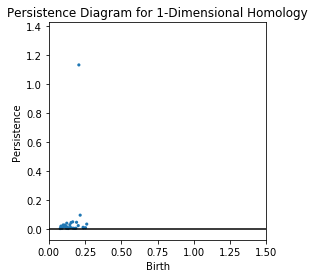

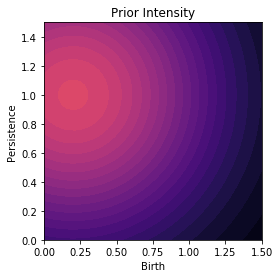

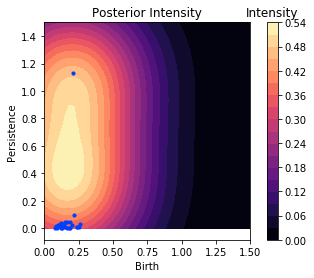

In [1]:
%matplotlib inline

# imports
import random
from ripser import ripser
from bayes_tda import *
from tadasets import dsphere
import numpy as np
from persim import plot_diagrams
import matplotlib.pyplot as plt
#-------------------

random.seed(14)
circle_samples = dsphere(n = 200, d = 1, noise = 0.1)
circle_diag = ripser(circle_samples)['dgms']
loops = circle_diag[1]

# plot circle and samples
circle_plot = plt.figure()
plt.scatter(x = circle_samples[:,0],y = circle_samples[:,1], s = 5)
plt.gca().set_ylabel('y')
plt.gca().set_xlabel('x')
circle = plt.Circle(xy = (0,0), radius = 1, fill = False, color = 'black')
plt.gca().add_artist(circle)
plt.gca().set_aspect('equal')
plt.show()
plt.close(circle_plot)

# plot persistence diagram
diag_plot = plot_diagrams(circle_diag,plot_only = [1],lifetime = True, legend = None, size = 10, xy_range = [0,1.5,0,1.5], title = 'Persistence Diagram for 1-Dimensional Homology', colormap = 'seaborn-bright')
plt.gca().set_ylabel('Persistence')
plt.show()
plt.close(diag_plot)

# plot prior
means = np.array([[0.2,1]])
ss = [0.5]
ws = [1]

pri = Prior(weights = ws,mus = means, sigmas = ss)

b = np.linspace(0,1.5,50)
p = np.linspace(0,1.5,50) 
#v = [0,0.09,0.18,0.27,0.36,0.45,0.54]

B,P = np.meshgrid(b,p)

I = list()
for ind in range(len(P)):
    l = list()
    for i in range(len(P)):
        l.append(pri.eval([B[ind][i],P[ind][i]]))
    I.append(l)

pri_plot = plt.figure()        
plt.style.use('seaborn-bright')
plt.contourf(B,P,I, 20, cmap = 'magma', vmin = 0, vmax = .54)
plt.title('Prior Intensity')
#cb = plt.colorbar()
#cb.ax.set_title('Intensity')
plt.gca().set_ylabel('Persistence')
plt.gca().set_xlabel('Birth')
plt.gca().set_aspect('equal')
plt.show()
plt.close(pri_plot)

# plot posterior
noise = Prior(weights = [10], mus = [[0,0]], sigmas = [0.2])
bp_loops = np.column_stack((loops[:,0],loops[:,1]-loops[:,0]))
post = Posterior(prior = pri,clutter = noise,Dy = bp_loops, sy = 0.2)

I = list()
for ind in range(len(P)):
    l = list()
    for i in range(len(P)):
        l.append(post.eval([B[ind][i],P[ind][i]]))
    I.append(l)
    
post_plot = plt.figure()        
plt.style.use('seaborn-bright')
plt.contourf(B,P,I, 20, cmap = 'magma')
plt.title('Posterior Intensity')
cb = plt.colorbar()
cb.ax.set_title('Intensity')
plt.gca().set_ylabel('Persistence')
plt.gca().set_xlabel('Birth')
plt.scatter(x = loops[:,0],y = loops[:,1]-loops[:,0], s = 10)
plt.gca().set_aspect('equal')
plt.show()
plt.close(post_plot)